In [3]:
import cv2
import numpy as np
img = cv2.imread('messi.jpg')

In [4]:
px = img[100,100]
print (px)

[29  7  1]


In [8]:
blue = img[100,100,0]
print (blue)

29


In [10]:
print (img.size)
print (img.dtype)

1354050
uint8


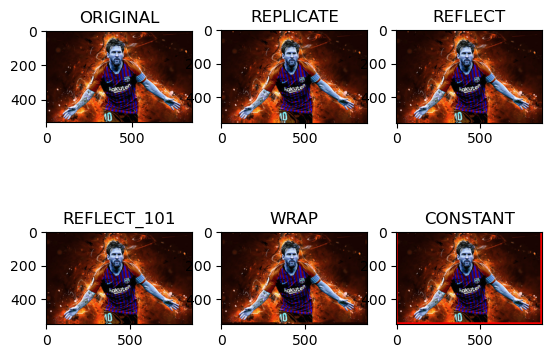

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('messi.jpg')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()


In [4]:
## Image Blending
import cv2
import numpy as np
from matplotlib import pyplot as plt
img1 = cv2.imread('op500.png')
img2 = cv2.imread('M500.jpg')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

In [2]:
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

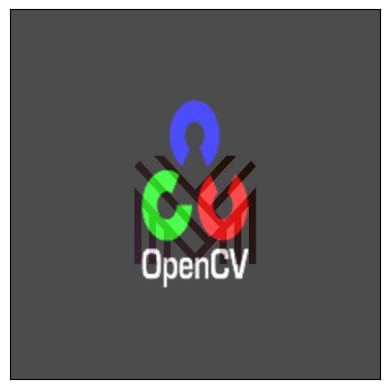

In [6]:
plt.imshow(dst)
plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load two images
img1 = cv2.imread('messi.jpg')
img2 = cv2.imread('op500.png')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()